No of rows:  65290
No of columns:  3
Data Types:
user_id     object
prod_id     object
rating     float64
dtype: object

Observations:
user_id: object
prod_id: object
rating: float64
Missing Values:
user_id    0
prod_id    0
rating     0
dtype: int64

Observations:
user_id: No missing values
prod_id: No missing values
rating: No missing values
Summary Statistics of 'rating' variable:
count    65290.000000
mean         4.294808
std          0.988915
min          1.000000
25%          4.000000
50%          5.000000
75%          5.000000
max          5.000000
Name: rating, dtype: float64

Observations:


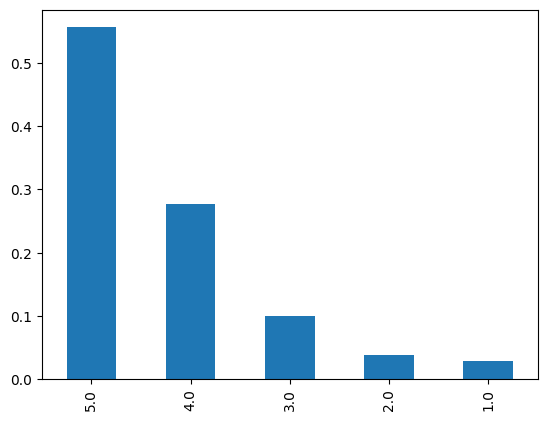

The number of observations in the final data =  65290
Number of unique USERS in Raw data =  1540
Number of unique ITEMS in Raw data =  5689
            Average Rating  Rating Count
prod_id                                 
B00LGQ6HL8             5.0             5
B003DZJQQI             5.0            14
B005FDXF2C             5.0             7
B00I6CVPVC             5.0             7
B00B9KOCYA             5.0             8
Computing the cosine similarity matrix...
Done computing similarity matrix.
user: A34BZM6S9L7QI4 item: 1400501466 r_ui = None   est = 4.29   {'was_impossible': True, 'reason': 'Not enough neighbors.'}
1.0360377640027891
{'k': 40, 'min_k': 1, 'sim_options': {'name': 'pearson', 'user_based': False}}
RMSE: 1.0012
Precision:  0.855
Recall:  0.858
F_1 score:  0.856
RMSE: 1.0012
Precision:  0.855
Recall:  0.858
F_1 score:  0.856
Best RMSE score: 0.9752486410956457
Best parameters: {'k': 20, 'min_k': 6, 'sim_options': {'name': 'msd', 'user_based': False}}


In [ ]:
from google.colab import drive
from google.colab import drive


!pip install --upgrade surprise


import warnings                                 # Used to ignore the warning given as output of the code
warnings.filterwarnings('ignore')

import numpy as np                              # Basic libraries of python for numeric and dataframe computations
import pandas as pd

import matplotlib.pyplot as plt                 # Basic library for data visualization
import seaborn as sns                           # Slightly advanced library for data visualization

from collections import defaultdict             # A dictionary output that does not raise a key error

from sklearn.metrics import mean_squared_error  # A performance metrics in sklearn

# Import the dataset

df = pd.read_csv('/content/ratings_Electronics.csv') # There are no headers in the data file

df.columns = ['user_id', 'prod_id', 'rating', 'timestamp'] # Adding column names

df = df.drop('timestamp', axis = 1) # Dropping timestamp

df_copy = df.copy(deep = True) # Copying the data to another DataFrame

# Get the column containing the users
users = df.user_id

# Create a dictionary from users to their number of ratings
ratings_count = dict()

for user in users:

    # If we already have the user, just add 1 to their rating count
    if user in ratings_count:
        ratings_count[user] += 1

    # Otherwise, set their rating count to 1
    else:
        ratings_count[user] = 1

# We want our users to have at least 50 ratings to be considered
RATINGS_CUTOFF = 50

remove_users = []

for user, num_ratings in ratings_count.items():
    if num_ratings < RATINGS_CUTOFF:
        remove_users.append(user)

df = df.loc[ ~ df.user_id.isin(remove_users)]

# Get the column containing the products
prods = df.prod_id

# Create a dictionary from products to their number of ratings
ratings_count = dict()

for prod in prods:

    # If we already have the product, just add 1 to its rating count
    if prod in ratings_count:
        ratings_count[prod] += 1

    # Otherwise, set their rating count to 1
    else:
        ratings_count[prod] = 1

# We want our item to have at least 5 ratings to be considered
RATINGS_CUTOFF = 5

remove_users = []

for user, num_ratings in ratings_count.items():
    if num_ratings < RATINGS_CUTOFF:
        remove_users.append(user)

df_final = df.loc[~ df.prod_id.isin(remove_users)]

# Print a few rows of the imported dataset
df_final.head()

rows, columns = df_final.shape
print("No of rows: ", rows)
print("No of columns: ", columns)

# Check Data types and provide observations
data_types = df_final.dtypes

# Display the data types
print("Data Types:")
print(data_types)

# Provide observations
print("\nObservations:")
for column, dtype in data_types.iteritems():
    print(f"{column}: {dtype}")

# Check for missing values and provide observations
missing_values = df_final.isnull().sum()

# Display the missing values
print("Missing Values:")
print(missing_values)

# Provide observations
print("\nObservations:")
for column, count in missing_values.iteritems():
    if count > 0:
        print(f"{column}: {count} missing values")
    else:
        print(f"{column}: No missing values")

# Summary statistics of 'rating' variable and provide observations
rating_stats = df_final['rating'].describe()

# Display the summary statistics
print("Summary Statistics of 'rating' variable:")
print(rating_stats)

# Provide observations
print("\nObservations:")
# Add any specific observations you want based on the summary statistics

df_final['rating'].value_counts(1).plot(kind='bar')

plt.show()

# Number of total rows in the data
print('The number of observations in the final data = ', len(df_final))

# Number of unique USERS in Raw data
print('Number of unique USERS in Raw data = ', df_final['user_id'].nunique())

# Number of unique ITEMS in Raw data
print('Number of unique ITEMS in Raw data = ', df_final['prod_id'].nunique())

df_final.head()

# Calculate the average rating for each product
average_rating = df_final.groupby('prod_id')['rating'].mean()

# Calculate the count of ratings for each product
count_rating = df_final.groupby('prod_id')['rating'].count()

# Create a dataframe with calculated average and count of ratings
final_rating = pd.DataFrame({'Average Rating': average_rating, 'Rating Count': count_rating})

# Sort the dataframe by average of ratings in the descending order
final_rating = final_rating.sort_values(by='Average Rating', ascending=False)

# See the first five records of the "final_rating" dataset
print(final_rating.head())

def top_n_products(final_rating, n, min_interaction):

    # Finding products with a minimum number of interactions
    recommendations = final_rating[final_rating['Rating Count'] >= min_interaction]

    # Sorting values with respect to average rating in descending order
    recommendations = recommendations.sort_values(by='Average Rating', ascending=False)

    return recommendations.index[:n]

def top_n_popular_products(final_rating, n, min_interaction):

    # Finding products with a minimum number of interactions
    popular_products = final_rating[final_rating['Rating Count'] >= min_interaction]

    # Sorting values with respect to the count of ratings in descending order
    popular_products = popular_products.sort_values(by='Rating Count', ascending=False)

    return popular_products.index[:n]

# To compute the accuracy of models
from surprise import accuracy

# Class is used to parse a file containing ratings, data should be in structure - user ; item ; rating
from surprise.reader import Reader

# Class for loading datasets
from surprise.dataset import Dataset

# For tuning model hyperparameters
from surprise.model_selection import GridSearchCV

# For splitting the rating data in train and test datasets
from surprise.model_selection import train_test_split

# For implementing similarity-based recommendation system
from surprise.prediction_algorithms.knns import KNNBasic

# For implementing matrix factorization based recommendation system
from surprise.prediction_algorithms.matrix_factorization import SVD

# for implementing K-Fold cross-validation
from surprise.model_selection import KFold

# For implementing clustering-based recommendation system
from surprise import CoClustering

def precision_recall_at_k(model, k = 10, threshold = 3.5):
    """Return precision and recall at k metrics for each user"""

    # First map the predictions to each user
    user_est_true = defaultdict(list)



    for uid, _, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))

    precisions = dict()
    recalls = dict()
    for uid, user_ratings in user_est_true.items():

        # Sort user ratings by estimated value
        user_ratings.sort(key = lambda x: x[0], reverse = True)

        # Number of relevant items
        n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings)

        # Number of recommended items in top k
        n_rec_k = sum((est >= threshold) for (est, _) in user_ratings[:k])

        # Number of relevant and recommended items in top k
        n_rel_and_rec_k = sum(((true_r >= threshold) and (est >= threshold))
                              for (est, true_r) in user_ratings[:k])

        # Precision@K: Proportion of recommended items that are relevant
        # When n_rec_k is 0, Precision is undefined. Therefore, we are setting Precision to 0 when n_rec_k is 0

        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 0

        # Recall@K: Proportion of relevant items that are recommended
        # When n_rel is 0, Recall is undefined. Therefore, we are setting Recall to 0 when n_rel is 0

        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 0

    # Mean of all the predicted precisions are calculated.
    precision = round((sum(prec for prec in precisions.values()) / len(precisions)), 3)

    # Mean of all the predicted recalls are calculated.
    recall = round((sum(rec for rec in recalls.values()) / len(recalls)), 3)

    accuracy.rmse(predictions)

    print('Precision: ', precision) # Command to print the overall precision

    print('Recall: ', recall) # Command to print the overall recall

    print('F_1 score: ', round((2*precision*recall)/(precision+recall), 3)) # Formula to compute the F-1 score

df_final.head()

# Instantiating Reader scale with expected rating scale
reader = Reader(rating_scale = (0, 5))

# Loading the rating dataset
data = Dataset.load_from_df(df_final[['user_id', 'prod_id', 'rating']], reader)

# Splitting the data into train and test datasets
trainset, testset = train_test_split(data, test_size = 0.2, random_state = 42)
# Instantiating Reader scale with expected rating scale
reader = Reader(rating_scale=(0, 5))

# Loading the rating dataset
data = Dataset.load_from_df(df_final[['user_id', 'prod_id', 'rating']], reader)

# Splitting the data into train and test datasets
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

# Assuming 'data' is your Surprise Dataset
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

# Declaring the similarity options
sim_options = {'name': 'cosine',
               'user_based': True}

# Initialize the KNNBasic model using sim_options provided, setting random_state = 1
sim_user_user = KNNBasic(sim_options=sim_options, random_state=1)

# Fit the model on the training data
sim_user_user.fit(trainset)

# Let us compute precision@k, recall@k, and f_1 score using the precision_recall_at_k function defined above
predictions = sim_user_user.test(testset)



# Predicting rating for a sample user with a non interacted product
sim_user_user.predict("A34BZM6S9L7QI4", "1400501466", verbose = True)




# Setting up parameter grid to tune the hyperparameters
param_grid = {'k': [40],  # Example values for the 'k' parameter
              'min_k': [1],  # Example values for the 'min_k' parameter
              'sim_options': {'name': ['cosine', 'msd', 'pearson', 'pearson_baseline'],
                               'user_based': [True, False]}
             }

# Assuming 'data' is your Surprise Dataset and 'KNNBasic' is the algorithm you want to tune
# Performing 3-fold cross-validation to tune the hyperparameters
gs = GridSearchCV(KNNBasic, param_grid, measures=['rmse'], cv=3, n_jobs=-1)

# Fitting the data
gs.fit(data)

# Best RMSE score
print(gs.best_score['rmse'])

# Combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])

# Using the optimal similarity measure for user-user based collaborative filtering
sim_options = {'name': 'cosine', 'user_based': True}

# Creating an instance of KNNBasic with optimal hyperparameter values
sim_user_user_optimized = KNNBasic(sim_options=sim_options, k=40, min_k=1, random_state=1, verbose=False)

# Training the algorithm on the train set
sim_user_user_optimized.fit(trainset)

# Let us compute precision@k and recall@k also with k = 10
precision_recall_at_k(model=sim_user_user_optimized, k=10)

# 0 is the inner id of the user
sim_user_user_optimized.get_neighbors(0, 5)

def get_recommendations(data, user_id, top_n, algo):

    # Creating an empty list to store the recommended product ids
    recommendations = []

    # Creating an user item interactions matrix
    user_item_interactions_matrix = data.pivot(index = 'user_id', columns = 'prod_id', values = 'rating')

    # Extracting those product ids which the user_id has not interacted yet
    non_interacted_products = user_item_interactions_matrix.loc[user_id][user_item_interactions_matrix.loc[user_id].isnull()].index.tolist()

    # Looping through each of the product ids which user_id has not interacted yet
    for item_id in non_interacted_products:

        # Predicting the ratings for those non interacted product ids by this user
        est = algo.predict(user_id, item_id).est

        # Appending the predicted ratings
        recommendations.append((item_id, est))

    # Sorting the predicted ratings in descending order
    recommendations.sort(key = lambda x: x[1], reverse = True)

    return recommendations[:top_n] # Returing top n highest predicted rating products for this user

    # Making top 5 recommendations for user_id "A3LDPF5FMB782Z" with a similarity-based recommendation engine
recommendations = get_recommendations(df_final, "A3LDPF5FMB782Z", 5, sim_user_user_optimized)
# Building the dataframe for above recommendations with columns "prod_id" and "predicted_ratings"
pd.DataFrame(recommendations, columns = ['prod_id', 'predicted_ratings'])

# Declaring the similarity options
sim_options = {'name': 'cosine',
               'user_based': False}

# KNN algorithm is used to find desired similar items
sim_item_item = KNNBasic(sim_options = sim_options, random_state = 1, verbose = False)

# Train the algorithm on the train set, and predict ratings for the test set
sim_item_item.fit(trainset)
precision_recall_at_k(model=sim_item_item, k=10)

sim_item_item.predict("A3LDPF5FMB78SZ", "1400501466")

# Predicting rating for a sample user with a non interacted product
sim_item_item.predict("A34BZM6S9L7QI4", "1400501466")

from surprise.model_selection import GridSearchCV
import surprise

# Setting up parameter grid to tune the hyperparameters
param_grid = {'k': [10, 20, 30],
              'min_k': [3, 6, 9],
              'sim_options': {'name': ['msd', 'cosine'],
                              'user_based': [False]}
             }

# Assuming 'data' is your Surprise Dataset and 'SVD' is the algorithm you want to tune
# Performing 3-fold cross-validation to tune the hyperparameters
gs = GridSearchCV(KNNBasic, param_grid, measures=['rmse'], cv=3, n_jobs=-1)

# Fitting the data
gs.fit(data)

# Find the best RMSE score
print("Best RMSE score:", gs.best_score['rmse'])

# Find the combination of parameters that gave the best RMSE score
print("Best parameters:", gs.best_params['rmse'])
